In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from apyori import apriori
import time

# Load the Dataset

In [3]:
store_data = pd.read_csv('chess.csv',encoding='utf-8', header = None)

In [4]:
store_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
1,1,3,5,7,9,12,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
2,1,3,5,7,9,12,13,16,17,19,...,56,58,60,62,64,66,68,70,72,74
3,1,3,5,7,9,11,13,15,17,20,...,56,58,60,62,64,66,68,70,72,74
4,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3192,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3193,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3194,2,4,5,8,9,11,13,16,17,19,...,56,58,61,62,64,67,68,71,73,74


In [5]:
store_data.fillna(0,inplace=True)

In [6]:
store_data.head()
store_data=store_data.astype(int)
store_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
1,1,3,5,7,9,12,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
2,1,3,5,7,9,12,13,16,17,19,...,56,58,60,62,64,66,68,70,72,74
3,1,3,5,7,9,11,13,15,17,20,...,56,58,60,62,64,66,68,70,72,74
4,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3192,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3193,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3194,2,4,5,8,9,11,13,16,17,19,...,56,58,61,62,64,67,68,71,73,74


In [7]:
rowlength = len(store_data)
no_features = len(store_data.values[0])

### Remove all 0 value which converted from nan

In [8]:
records = []
for i in range(0, rowlength):
    records.append([int(store_data.values[i,j]) for j in range(0, no_features)if int(store_data.values[i,j]) != 0])

In [9]:
threshold = 1
total_time = []
threshold_val = []

for i in range(0,3):
  start = time.time()
  rules = apriori(records,min_support=threshold)
  output = list(rules)
  end = time.time()
  total_time.append(end-start)
  threshold_val.append(threshold)
  threshold = threshold - 0.1
  print(rules)

In [10]:
output

[RelationRecord(items=frozenset({3}), support=0.8882978723404256, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({3}), confidence=0.8882978723404256, lift=1.0)]),
 RelationRecord(items=frozenset({5}), support=0.9295994993742178, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({5}), confidence=0.9295994993742178, lift=1.0)]),
 RelationRecord(items=frozenset({7}), support=0.9624530663329162, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({7}), confidence=0.9624530663329162, lift=1.0)]),
 RelationRecord(items=frozenset({9}), support=0.8992490613266583, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({9}), confidence=0.8992490613266583, lift=1.0)]),
 RelationRecord(items=frozenset({25}), support=0.8948685857321652, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({25}), confidence=0.8948685857321652, lift=1.0)]),
 RelationReco

Text(0, 0.5, 'Threshold')

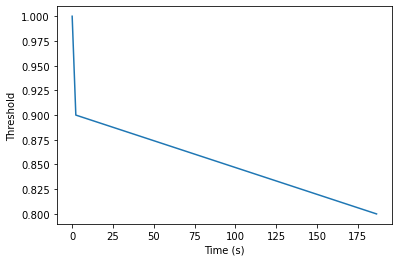

In [11]:
from matplotlib import pyplot as plt

plt.plot(total_time, threshold_val, label='Chess dataset')
plt.xlabel("Time (s)")
plt.ylabel("Threshold")